In [1]:
from golftracker import golf_swing_repository
import os
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = [16, 8]


In [2]:
test1_db = os.path.join("..", "assets", "test1.pkl")
test1_path = os.path.join("..", "assets")
gs = golf_swing_repository.reconstitute(test1_db, test1_path)

In [3]:
def image_pipeline(img):
    img_blur = cv2.GaussianBlur(img, (7, 7) , 1)
    img_gray = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(img_gray, 125, 255, cv2.THRESH_BINARY_INV)[1]
    
    threshold1 = 100
    threshold2 = 200
    img_canny = cv2.Canny(thresh, threshold1, threshold2)
    kernel = np.ones((5, 5))
    img_dil = cv2.dilate(img_canny, kernel, iterations=1)
    return img_dil

In [23]:
frames = gs.get_video_frames()
points = gs.get_screen_points(0)
right_wrist = points['right_wrist']

>>New video has width=432, ht=768, fps=30


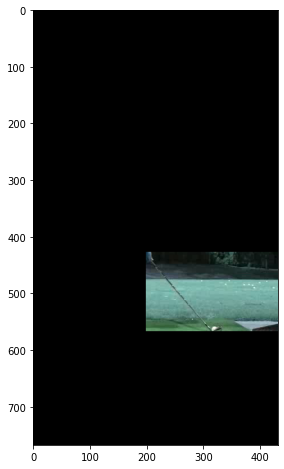

In [45]:
f = frames[0].copy()
mask = np.zeros(f.shape, np.uint8)
mask[427:567, 199:450] = f[427:567, 199:450]
plt.imshow(mask)

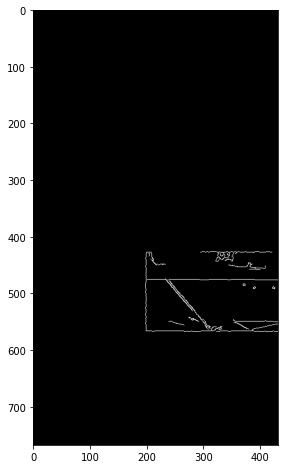

In [48]:
low_threshold = 50
high_threshold = 150
gray = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.imshow(edges, cmap='gray')

In [49]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

Number of lines=14
Slope=1.1891891891891893


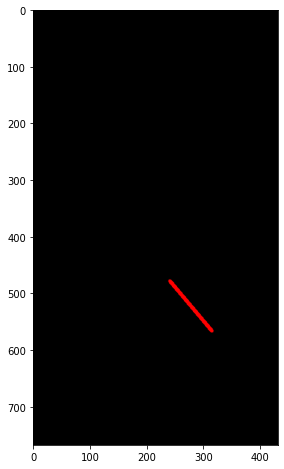

In [59]:
from golftracker import geom
print(f"Number of lines={len(lines)}")
line_image = np.copy(img) * 0
for x1,y1,x2,y2 in lines[0]:
    cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
    m = geom.gradient((x1, y1), (x2, y2))
    print(f"Slope={m}")
    plt.imshow(line_image)

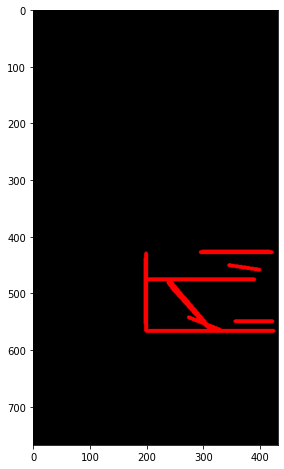

In [52]:
plt.imshow(line_image)

In [42]:
mask = np.zeros((f.shape[0], f.shape[1]), np.uint8)
print(right_wrist)

[199, 427]


In [43]:
tmp = image_pipeline(masked_data)

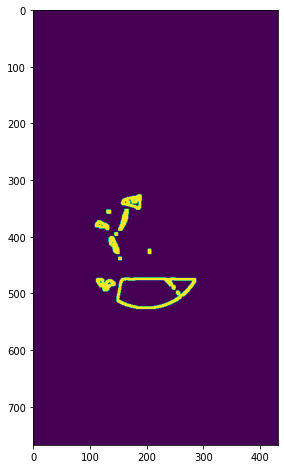

In [44]:
plt.imshow(tmp)

In [11]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [12]:
print(len(contours))

9


In [13]:
m1 = img.copy()

In [25]:
def show_contour(img, cnts, idx):
    f = np.zeros(img.shape, np.uint8)
    cv2.drawContours(f, cnts, idx, (255, 0, 0), 3)
    plt.imshow(f, cmap='gray')

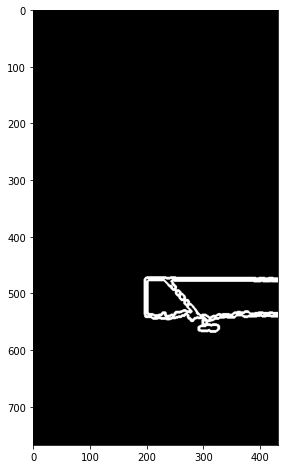

In [39]:

show_contour(img, contours, 5)